# 1. 단항 선형 회귀 실습
- 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(2024)

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])
print(x_train, x_train.shape)
print(y_train,y_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]]) torch.Size([3, 1])


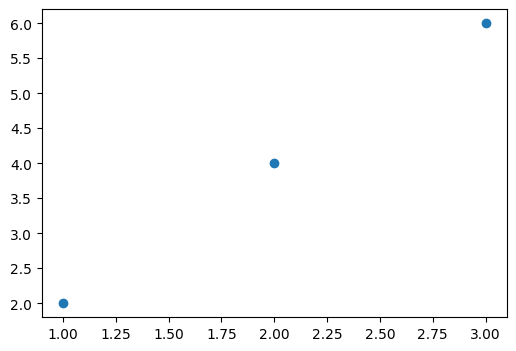

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x_train,y_train)

In [ ]:
# y = ax + b -> y = Wx + b

model = nn.Linear(1,1)
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [ ]:
y_pred = model(x_train)
print(y_pred)       # 당연히 학습을 안했고 그냥 데이터만 넣었으니 제대로된 값이 예측이 안되는것이다.

tensor([[0.7260],
        [0.7894],
        [0.8528]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters())) # W: 0.0634 b : 0.06625

# y= 0.0634x + 0.6625
0.0634 + 0.6625

[Parameter containing:
tensor([[0.0634]], requires_grad=True), Parameter containing:
tensor([0.6625], requires_grad=True)]


0.7259

In [ ]:
# MSE     구하는법 = 예측값 - 실제값 제곱 2
((y_pred - y_train) **2).mean()

tensor(12.8082, grad_fn=<MeanBackward0>)

In [ ]:
loss = nn.MSELoss()(y_pred,y_train)
loss

tensor(12.8082, grad_fn=<MseLossBackward0>)

In [ ]:
# 데이터 : 1,2,3
# W : , b:
# y = Wx + b

print(0.0634*1 + 0.6625)
print(0.0634*2 + 0.6625)
print(0.0634*3 + 0.6625)

0.7259
0.7893
0.8527


# 2. 경사하강법(Gradient Descent)
- 비용함수의 값을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저(최적화) 알고리즘이라고 함
- 옵티마이저 알고리즘 중 가장 기본적인 기술이 경사 하강법
- 옵티마이저 알고리즘을 통해 W와 b를 찾아낸 과정을 "학습" 이라고 부름
<center><img src='https://i.imgur.com/0fW4LTG.png' width=600></center>

In [ ]:
'''
SGD(Stochastic Gradient Descent)
- 랜덤하게 데이터를 하나씩 뽑아서 loss을 만듬(랜덤이라 Stochastic)
- 데이터를 뽑고 다시 데이터를 넣고 반복
- 빠르게 방향을 결정

학습률(Learning rate)
- 한 번 움직이는 거리(increment step)
'''

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
loss = nn.MSELoss()(y_pred,y_train)

In [ ]:
# gradient를 초기화
optimizer.zero_grad()

#역전파 : 비용 함수를 미분하여 gradient(기울기) 계산
loss.backward()

# W와 b를 업데이트
optimizer.step()

print(list(model.parameters()))

[Parameter containing:
tensor([[0.2177]], requires_grad=True), Parameter containing:
tensor([0.7267], requires_grad=True)]


In [ ]:
# 반복 학습을 통해 틀린 W, 를 수정하면서 오차를 계속 줄여나감
# epochs : 반복 학습 횟수(에포크)
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')

Epoch: 0/1000 Loss: 0.001857
Epoch: 100/1000 Loss: 0.001148
Epoch: 200/1000 Loss: 0.000709
Epoch: 300/1000 Loss: 0.000438
Epoch: 400/1000 Loss: 0.000271
Epoch: 500/1000 Loss: 0.000167
Epoch: 600/1000 Loss: 0.000103
Epoch: 700/1000 Loss: 0.000064
Epoch: 800/1000 Loss: 0.000039
Epoch: 900/1000 Loss: 0.000024
Epoch: 1000/1000 Loss: 0.000015


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9955]], requires_grad=True), Parameter containing:
tensor([0.0102], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[8]])
y_pred = model(x_test)
print(y_pred)

tensor([[15.9742]], grad_fn=<AddmmBackward0>)


# 3. 다중 선형 회귀
- 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조


In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [92,90,89],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[150], [190], [180], [200], [130]])

print(x_train,x_train.shape)
print(y_train,y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]]) torch.Size([5, 3])
tensor([[150.],
        [190.],
        [180.],
        [200.],
        [130.]]) torch.Size([5, 1])


In [ ]:
# y = ax + b
# y = a1x a2x + a3x ... + b

model = nn.Linear(3, 1)
print(model)

optimizer = optim.SGD(model.parameters(), lr=0.00001)

epochs = 10000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')


Linear(in_features=3, out_features=1, bias=True)
Epoch: 0/10000 Loss: 60941.207031
Epoch: 1000/10000 Loss: 33.815941
Epoch: 2000/10000 Loss: 32.000214
Epoch: 3000/10000 Loss: 30.612570
Epoch: 4000/10000 Loss: 29.489704
Epoch: 5000/10000 Loss: 28.535732
Epoch: 6000/10000 Loss: 27.694208
Epoch: 7000/10000 Loss: 26.931723
Epoch: 8000/10000 Loss: 26.228016
Epoch: 9000/10000 Loss: 25.570881
Epoch: 10000/10000 Loss: 24.952616


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.1969, 0.5851, 1.2221]], requires_grad=True), Parameter containing:
tensor([-0.3012], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[92,90,89]])
y_pred = model(x_test)
print(y_pred)

tensor([[179.2364]], grad_fn=<AddmmBackward0>)
